In [ ]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


data_set='/work/creditcard.csv'

In [ ]:
def dataset_summary(train_X, test_X, train_y, test_y):
    
    print()
    print("---------Dataset Summary----------")
    print("Total training samples:", len(train_X))
    print("Total training samples corresponding to class 0:", len(train_y[train_y[:]==0]))
    print("Total training samples corresponding to class 1:", len(train_y[train_y[:]==1]))
    print()
    print("Total testing samples:", len(test_X))
    print("Total testing samples corresponding to class 0:", len(test_y[test_y[:]==0]))
    print("Total testing samples corresponding to class 1:", len(test_y[test_y[:]==1]))
    print("----------------------------------")
    print()

In [ ]:
def oversampling(X, y):
    print("doing over sampling....")
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X, y)
    return X_over, y_over

In [ ]:
def undersampling(X, y):
    print("doing under sampling....")
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X, y)
    return X_under, y_under

In [ ]:
def Sampling(X,y,strategy="over"):
    if(strategy == "over"):
        return oversampling(X,y)
    elif(strategy == "under"):
         return undersampling(X,y)
    else:
         return X,y

In [ ]:
#importing the data

def read_dataset(csv_file_path,isSampling=False,isScaling=False ,test_size=0.2, random_state=100):
    df = pd.read_csv(csv_file_path)
    df = df.drop(['Amount','Time'], axis=1)
    
    y = df['Class']
    X = df.drop(['Class'], axis=1)
    
    if isSampling:
        print("With Sampling")
        X,y=Sampling(X,y,'under')
    else:
        print("Without Sampling")
    
    #random state is for reproducing the same training and testing set,if we do not use this then
    #every time it will give different sets

    #spliting the data set into training and testing set
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = test_size, random_state=random_state)
    
    if isScaling:
        print("MinMax Scalling is done")
        #MinMax scaling
        scaler = MinMaxScaler()
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)
    
    return train_X, test_X, train_y, test_y

In [ ]:
def classifier_entropy_based(X_train,Y_train,X_test,cat="entropy"):
    print("Decision Tree classifier using ",cat," based information gain")

    #training using criteria
    criteria=DecisionTreeClassifier(criterion=cat,random_state=100,max_depth=3,min_samples_leaf=5)
    criteria.fit(X_train,Y_train)
    y_predict=criteria.predict(X_test) 

    tree.plot_tree(criteria)
    plt.show()

    return y_predict

In [ ]:
def evaluate(test_y,y_pred):
    #doubt 
    #y_pred = y_pred >= 0.5
        
    print()
    print("Classification Report:")
    print(classification_report(test_y, y_pred))
        
    cf_matrix = confusion_matrix(test_y, y_pred)
        
    print()
    print("Confusion Matrix:")
    print(cf_matrix)
    print ("Accuracy : ",accuracy_score(test_y,y_pred)*100)
    sns.heatmap(cf_matrix, annot=True, fmt='g')
        
    plt.show()

With Sampling
doing over sampling....

---------Dataset Summary----------
Total training samples: 454904
Total training samples corresponding to class 0: 227735
Total training samples corresponding to class 1: 227169

Total testing samples: 113726
Total testing samples corresponding to class 0: 56580
Total testing samples corresponding to class 1: 57146
----------------------------------

Decision Tree classifier using  entropy  based information gain


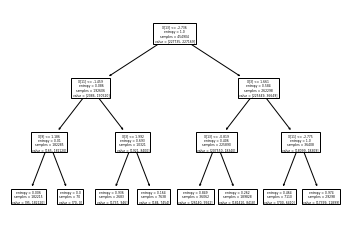


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     56580
           1       0.99      0.86      0.92     57146

    accuracy                           0.93    113726
   macro avg       0.94      0.93      0.93    113726
weighted avg       0.94      0.93      0.93    113726


Confusion Matrix:
[[56326   254]
 [ 7774 49372]]
Accuracy :  92.94092819583912


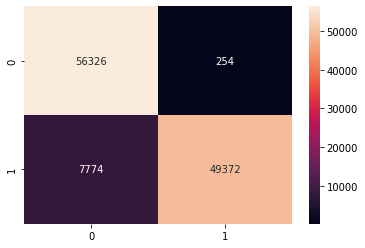

In [ ]:
if __name__ == '__main__':
    
    # X,y = read_dataset('../creditcard.csv')

    # for sampling of data pass True after csv file, by default it is false
    # for scalling of data pass True after sampling 
    train_X, test_X, train_y, test_y = read_dataset(data_set,True)
    dataset_summary(train_X, test_X, train_y, test_y)

    #by default entropy based classifier 
    y_predict=classifier_entropy_based(train_X,train_y,test_X)

    #gini based classsifier
    # y_predict=classifier_entropy_based(train_X,train_y,test_X,"gini")
    evaluate(test_y,y_predict)
    






In [ ]:
When to stop splitting?
Usually, real-world datasets have a large number of features, which will result in a 
large number of splits, which in turn gives a huge tree. Such trees take time to build 
and can lead to overfitting. That means the tree will give very good accuracy on the training 
dataset but will give bad accuracy in test data.

There are many ways to tackle this problem through hyperparameter tuning.
We can set the maximum depth of our decision tree using the max_depth parameter. 
The more the value of max_depth, the more complex your tree will be. 
The training error will off-course decrease if we increase the max_depth value but 
when our test data comes into the picture, we will get a very bad accuracy. Hence you need a 
value that will not overfit as well as underfit our data and for this, you can use GridSearchCV.

Another way is to set the minimum number of samples for each spilt. It is denoted by min_samples_split. 
Here we specify the minimum number of samples required to do a spilt. For example, we can use 
a minimum of 10 samples to reach a decision. That means if a node has less than 10 samples then
using this parameter, we can stop the further splitting of this node and make it a leaf node.

There are more hyperparameters such as :

min_samples_leaf – represents the minimum number of samples required to be in the leaf node. 
The more you increase the number, the more is the possibility of overfitting.

max_features – it helps us decide what number of features to consider when looking for the 
best split.

SyntaxError: invalid syntax (<ipython-input-8-b4615936b079>, line 2)

With Sampling
doing under sampling....

---------Dataset Summary----------
Total training samples: 787
Total training samples corresponding to class 0: 386
Total training samples corresponding to class 1: 401

Total testing samples: 197
Total testing samples corresponding to class 0: 106
Total testing samples corresponding to class 1: 91
----------------------------------

Decision Tree classifier using  entropy  based information gain


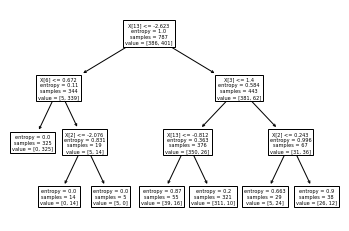


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       106
           1       0.96      0.87      0.91        91

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197


Confusion Matrix:
[[103   3]
 [ 12  79]]
Accuracy :  92.38578680203045


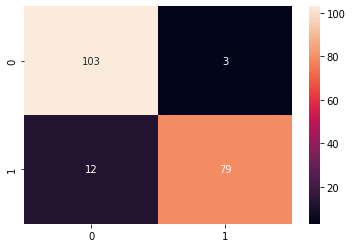

In [ ]:
if __name__ == '__main__':
    
    # X,y = read_dataset('../creditcard.csv')

    # for sampling of data pass True after csv file, by default it is false
    # for scalling of data pass True after sampling 
    train_X, test_X, train_y, test_y = read_dataset(data_set,True)
    dataset_summary(train_X, test_X, train_y, test_y)

    #by default entropy based classifier 
    y_predict=classifier_entropy_based(train_X,train_y,test_X)

    #gini based classsifier
    # y_predict=classifier_entropy_based(train_X,train_y,test_X,"gini")
    evaluate(test_y,y_predict)
    






Without Sampling

---------Dataset Summary----------
Total training samples: 227845
Total training samples corresponding to class 0: 227449
Total training samples corresponding to class 1: 396

Total testing samples: 56962
Total testing samples corresponding to class 0: 56866
Total testing samples corresponding to class 1: 96
----------------------------------

Decision Tree classifier using  entropy  based information gain


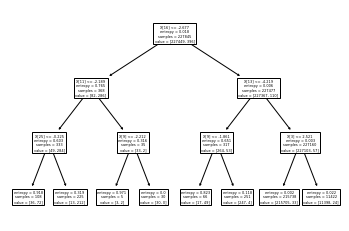


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.78      0.75        96

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56838    28]
 [   21    75]]
Accuracy :  99.91397773954567


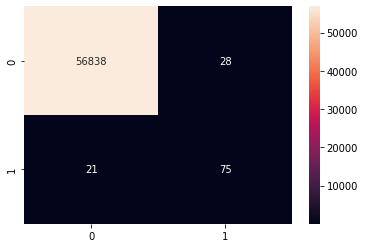

In [ ]:
if __name__ == '__main__':
    
    # X,y = read_dataset('../creditcard.csv')

    # for sampling of data pass True after csv file, by default it is false
    # for scalling of data pass True after sampling 
    train_X, test_X, train_y, test_y = read_dataset(data_set,False)
    dataset_summary(train_X, test_X, train_y, test_y)

    #by default entropy based classifier 
    y_predict=classifier_entropy_based(train_X,train_y,test_X)

    #gini based classsifier
    # y_predict=classifier_entropy_based(train_X,train_y,test_X,"gini")
    evaluate(test_y,y_predict)
    






<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=920001f5-8a05-4b55-92fa-5a8f292e2307' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>